## Mathematics of Machine Learning

### 8th Exercise: Stochastic Gradient Descent

In [1]:
import torch
import torch.nn as nn

import random
import numpy as np
import matplotlib.pyplot as plt

#### (0) Preparation

In [2]:
# Load data
X = np.genfromtxt("data_MNIST_78_X.csv", delimiter=',')
Y = np.genfromtxt("data_MNIST_78_Y.csv", delimiter=',')

In [3]:
# Transfom the labels in +1 (7) and -1 (8)
# y = (y == 7) - (y == 8)
for ind, val in enumerate(Y):
    if val == 7:
        Y[ind] = +1
    else:
        Y[ind] = -1

In [4]:
print(X.shape)
print(Y)
print(Y.shape)

(784, 12116)
[ 1.  1.  1. ... -1. -1. -1.]
(12116,)


In [5]:
# Size of the dataset
m = len(Y)
print(m)

12116


In [6]:
# Number of features (= dimension of the feature space)
d = X.shape[0]
print(d)

784


#### (1) Gradient Descent for Log-Loss

In [7]:
# Auxiliary quantities for faster calculation of y*(w*x+b):
X1 = np.r_[X, np.ones((1, m))]
X1Y = np.tile(Y, (X1.shape[0], 1)) * X1

def exp_XY(w): return np.exp(-np.dot(w.T, X1Y)).T


In [8]:
# Empirical log-Risk as a function of e = exp(- y*(w*x+b))
def RS(e): return np.mean(np.log(1 + e), axis=0)

In [9]:
# Gradient of the empirical log-Risk again as a function of e = exp(- y*(w*x+b))
def Grad_RS(e): return - np.divide((np.dot(X1, ((Y * e)/(1 + e)))), m)
# Grad_RS = @(e) - (X1 * ( (Y .* e)./(1+e) ) )/m;

In [10]:
# Estimate Lipschitz constant of the gradient according to lecture
L = 1/4 * np.mean(np.sum(X * X, axis = 0))
print(L)

22.100453956614945


In [11]:
# Maximum allowed step size according to lecture
eta = 1/L
print(eta)

0.045247939339304266


In [12]:
# Gradient Descent

n_iter = 10 # Step count
# n_iter = m

# Matrix of iterates
ws = np.zeros((d+1, n_iter+1)) 

# Start point w_0
ws[:, 0] = np.append(np.zeros((d, 1)), np.array([1])) 

In [13]:
for i in range(n_iter):
    # Calculation of exp(- y*(w*x+b))
    e = exp_XY(ws[:, i])
    # Gradient step
    ws[:, i+1] = ws[:, i] - eta * Grad_RS(e)

In [14]:
# Calculation of empirical risks for all iterates
Fs = RS(exp_XY(ws))
print(Fs)

[0.79617684 0.63888007 0.56253391 0.51537577 0.4792754  0.44906741
 0.42297626 0.40013429 0.37997485 0.36207024 0.34607894]


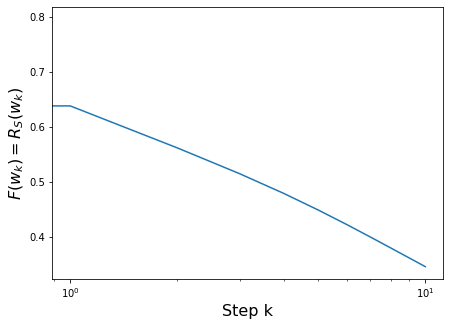

In [15]:
# Plot the function
fig, ax = plt.subplots(figsize=(7, 5))

plt.semilogx(Fs)

plt.xlabel('Step k', fontsize=16)
plt.ylabel('$ F(w_{k}) = R_S(w_k) $', fontsize=16)

plt.show()

#### (2) Stochastic Gradient Descent

In [16]:
# Number of steps and step sizes
n_iter_SGD = m
def eta_k(k): return 0.5/(1+k)

# Matrix of iterates
ws_SGD = np.zeros((d+1, n_iter_SGD+1))

#Start point w_0
ws_SGD[:, 0] = np.append(np.zeros((d, 1)), np.array([1])) 

In [17]:
for i in range(n_iter_SGD):
    ind = np.random.choice(m) # selecting random data point
    x = X1[:, ind] # corresponding feature x
    y = Y[ind] # corresponding label y
    e = np.exp(-np.dot(y, np.dot(ws_SGD[:, i].T, x))) # Calculation of exp(- y*(w*x+b))
    v = - np.dot((y*e/(1+e)), x) # Direction of the gradient for data point (x,y)
    
    # Gradient step
    ws_SGD[:, i+1] = ws_SGD[:, i] - eta_k(i) * v
    print(eta_k(i))

0.5
0.25
0.16666666666666666
0.125
0.1
0.08333333333333333
0.07142857142857142
0.0625
0.05555555555555555
0.05
0.045454545454545456
0.041666666666666664
0.038461538461538464
0.03571428571428571
0.03333333333333333
0.03125
0.029411764705882353
0.027777777777777776
0.02631578947368421
0.025
0.023809523809523808
0.022727272727272728
0.021739130434782608
0.020833333333333332
0.02
0.019230769230769232
0.018518518518518517
0.017857142857142856
0.017241379310344827
0.016666666666666666
0.016129032258064516
0.015625
0.015151515151515152
0.014705882352941176
0.014285714285714285
0.013888888888888888
0.013513513513513514
0.013157894736842105
0.01282051282051282
0.0125
0.012195121951219513
0.011904761904761904
0.011627906976744186
0.011363636363636364
0.011111111111111112
0.010869565217391304
0.010638297872340425
0.010416666666666666
0.01020408163265306
0.01
0.00980392156862745
0.009615384615384616
0.009433962264150943
0.009259259259259259
0.00909090909090909
0.008928571428571428
0.00877192982456

9.37031484257871e-05
9.368559115608019e-05
9.366804046459348e-05
9.365049634763064e-05
9.363295880149813e-05
9.361542782250516e-05
9.359790340696369e-05
9.358038555118848e-05
9.356287425149701e-05
9.354536950420954e-05
9.352787130564908e-05
9.35103796521414e-05
9.349289454001496e-05
9.347541596560104e-05
9.345794392523364e-05
9.344047841524949e-05
9.342301943198804e-05
9.340556697179151e-05
9.338812103100486e-05
9.337068160597572e-05
9.335324869305452e-05
9.333582228859437e-05
9.33184023889511e-05
9.33009889904833e-05
9.328358208955224e-05
9.326618168252192e-05
9.324878776575905e-05
9.323140033563304e-05
9.321401938851603e-05
9.319664492078285e-05
9.317927692881103e-05
9.31619154089808e-05
9.314456035767511e-05
9.312721177127957e-05
9.310986964618249e-05
9.30925339787749e-05
9.307520476545048e-05
9.305788200260562e-05
9.304056568663938e-05
9.302325581395348e-05
9.300595238095238e-05
9.298865538404315e-05
9.297136481963555e-05
9.295408068414203e-05
9.29368029739777e-05
9.291953168556031

5.033219247030401e-05
5.032712632108707e-05
5.032206119162641e-05
5.031699708161417e-05
5.03119339907426e-05
5.0306871918704096e-05
5.0301810865191146e-05
5.0296750829896386e-05
5.0291691812512574e-05
5.0286633812732576e-05
5.0281576830249393e-05
5.0276520864756156e-05
5.027146591594611e-05
5.0266411983512615e-05
5.0261359067149175e-05
5.02563071665494e-05
5.0251256281407036e-05
5.024620641141594e-05
5.0241157556270096e-05
5.023610971566362e-05
5.023106288929074e-05
5.022601707684581e-05
5.02209722780233e-05
5.021592849251783e-05
5.02108857200241e-05
5.0205843960236973e-05
5.020080321285141e-05
5.019576347756249e-05
5.019072475406545e-05
5.018568704205561e-05
5.0180650341228424e-05
5.017561465127948e-05
5.0170579971904475e-05
5.016554630279924e-05
5.016051364365971e-05
5.015548199418196e-05
5.0150451354062184e-05
5.014542172299669e-05
5.0140393100681907e-05
5.01353654868144e-05
5.0130338881090835e-05
5.012531328320802e-05
5.012028869286287e-05
5.011526510975243e-05
5.0110242533573865e-

In [18]:
# Calculation of empirical risks for all iterates
Fs_SGD = RS(exp_XY(ws_SGD))
print(Fs_SGD)

[0.79617684 8.03838413 1.40909954 ... 0.24649419 0.24649391 0.24649264]


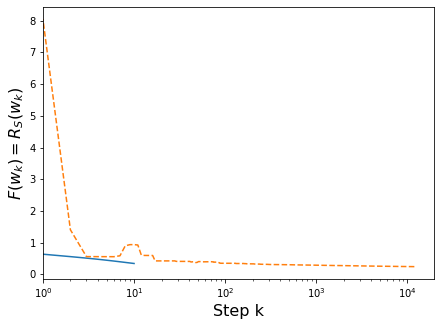

In [19]:
# Plot the function
fig, ax = plt.subplots(figsize=(7, 5))

plt.semilogx(Fs)
plt.semilogx(Fs_SGD, '--')

plt.xlim(xmin=10e-1)

plt.xlabel('Step k', fontsize=16)
plt.ylabel('$ F(w_{k}) = R_S(w_k) $', fontsize=16)

plt.show()

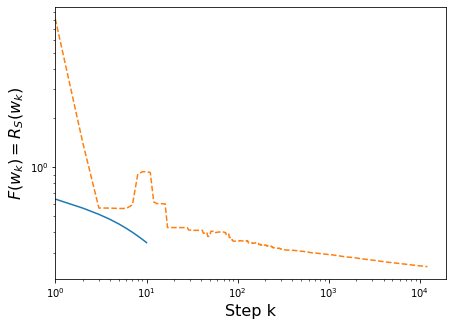

In [20]:
# Plot the function
fig, ax = plt.subplots(figsize=(7, 5))

plt.loglog(Fs)
plt.loglog(Fs_SGD, '--')

plt.xlim(xmin=10e-1)

plt.xlabel('Step k', fontsize=16)
plt.ylabel('$ F(w_{k}) = R_S(w_k) $', fontsize=16)

plt.show()

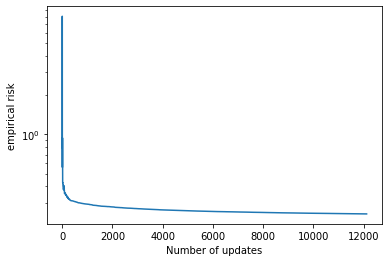

In [21]:
plt.plot(Fs_SGD)
plt.xlabel("Number of updates")
plt.ylabel("empirical risk")
plt.yscale("log")
# plt.xscale("log")
plt.show()

hier SGD mit PyTorch implementieren

https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD

Parameters:

params (iterable) – iterable of parameters to optimize or dicts defining parameter groups

lr (float) – learning rate

momentum (float, optional) – momentum factor (default: 0)

weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

dampening (float, optional) – dampening for momentum (default: 0)

nesterov (bool, optional) – enables Nesterov momentum (default: False)

maximize (bool, optional) – maximize the params based on the objective, instead of minimizing (default: False)

foreach (bool, optional) – whether foreach implementation of optimizer is used (default: None)

Bei uns wird nur params und lr defieniert.


Hier ist es Loss Grafik, Zeile 16 als Beispiel
https://gist.github.com/mbjoseph/f19341c8e1357549d52bfdbbc4a0c595

#### (2) Stochastic Gradient Descent in PyTorch

In [22]:
# build the model
class LogisticRegression(torch.nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = torch.nn.Linear(input_dim, output_dim)
     def forward(self, x):
         outputs = torch.sigmoid(self.linear(x))
         return outputs

In [23]:
# from numpy array to tensor
X = torch.from_numpy(X.T.astype(np.float32))
Y = torch.from_numpy(Y.astype(np.float32))
print(X.shape)

torch.Size([12116, 784])


In [24]:
# Number of data pairs and features 
m, d = X.shape
print(m, d)

12116 784


In [25]:
# assigning some hyper-parameters:
epochs = m # Indicates the number of passes through the entire training dataset the network has completed
input_dim = d 
output_dim = 1 # Single output 
learning_rate = 0.5

In [26]:
model = LogisticRegression(input_dim, output_dim)

In [27]:
# Binary Cross Entropy Loss
criterion = torch.nn.BCELoss()

In [28]:
# SGD: Implements stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
# adjusting learning rate
lambda1 = lambda epoch: 1/(1+epoch)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

In [30]:
losses = []
iter = 0
for epoch in range(epochs):
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X)
    
    loss = criterion(torch.squeeze(outputs), Y) 
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    scheduler.step()
    
    losses.append(loss.item())
    iter+=1
    
    # print(scheduler.get_last_lr())
    # print(optimizer.param_groups[0]['lr'])

In [31]:
print(losses)

[0.7088482975959778, -3.2822346687316895, -4.65988302230835, -5.573227882385254, -6.2473297119140625, -6.772387981414795, -7.194917678833008, -7.543344497680664, -7.836277961730957, -8.086165428161621, -8.301843643188477, -8.490469932556152, -8.657156944274902, -8.80588150024414, -8.939545631408691, -9.060538291931152, -9.170714378356934, -9.271611213684082, -9.364480972290039, -9.45033073425293, -9.530013084411621, -9.60425090789795, -9.673653602600098, -9.738768577575684, -9.800060272216797, -9.857894897460938, -9.912585258483887, -9.964410781860352, -10.013606071472168, -10.060384750366211, -10.104940414428711, -10.147445678710938, -10.188071250915527, -10.226948738098145, -10.264205932617188, -10.29996395111084, -10.334321975708008, -10.367377281188965, -10.399227142333984, -10.429950714111328, -10.459623336791992, -10.48830795288086, -10.51606559753418, -10.542946815490723, -10.568999290466309, -10.594265937805176, -10.618782043457031, -10.64258861541748, -10.665722846984863, -10.

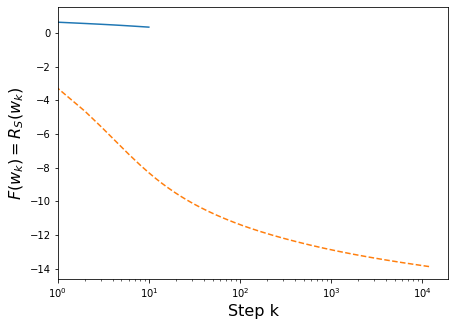

In [32]:
# Plot the function
fig, ax = plt.subplots(figsize=(7, 5))

plt.semilogx(Fs)
plt.semilogx(losses, '--')

plt.xlim(xmin=10e-1)

plt.xlabel('Step k', fontsize=16)
plt.ylabel('$ F(w_{k}) = R_S(w_k) $', fontsize=16)

plt.show()

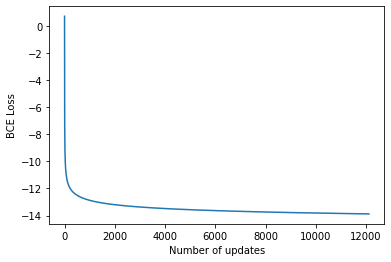

In [33]:
plt.plot(losses)
plt.xlabel("Number of updates")
plt.ylabel("BCE Loss")
# plt.yscale("log")
# plt.xscale("log")
plt.show()